In [3]:
import pandas as pd

# CSV file load karo
df = pd.read_csv("Train Dataset.csv")

# Check karne ke liye
print(df.head())

   Unnamed: 0         Crop   N   P    K    pH  rainfall  temperature
0       10182       barley  70  40   45  5.54     75.32    22.676000
1       16280    sunflower  50  60   30  5.54    297.66    29.566667
2       54944  sweetpotato  90  20  120  5.02    689.88    29.037273
3       98212         rice  80  40   40  5.66    297.66    29.566667
4       52108     soyabean  20  60   20  5.38   1011.49    30.430000


In [12]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df

,Crop,N,P,K,pH,rainfall,temperature
0,barley,70,40,45,5.54,75.32,22.676000
1,sunflower,50,60,30,5.54,297.66,29.566667
2,sweetpotato,90,20,120,5.02,689.88,29.037273
3,rice,80,40,40,5.66,297.66,29.566667
4,soyabean,20,60,20,5.38,1011.49,30.430000
...,...,...,...,...,...,...,...
18074,onion,120,60,65,5.82,1026.64,29.186364
18075,mango,20,20,30,5.16,884.50,27.654545
18076,jowar,80,40,40,5.44,770.44,28.680000
18077,papaya,50,50,50,5.94,1111.68,28.648182


In [4]:
df.head()

,Unnamed: 0,Crop,N,P,K,pH,rainfall,temperature
0,10182,barley,70,40,45,5.54,75.32,22.676000
1,16280,sunflower,50,60,30,5.54,297.66,29.566667
2,54944,sweetpotato,90,20,120,5.02,689.88,29.037273
3,98212,rice,80,40,40,5.66,297.66,29.566667
4,52108,soyabean,20,60,20,5.38,1011.49,30.430000


In [5]:
df.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature
count,18079.000000,18079.000000,18079.000000,18079.000000,18079.000000,18079.000000,18079.000000
mean,49799.491565,72.683500,43.489408,41.607666,5.581247,661.896078,26.496760
std,28625.445698,40.019864,14.051089,27.584765,0.477354,578.161909,4.970138
min,8.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000
25%,25037.000000,50.000000,40.000000,20.000000,5.340000,127.680000,22.890909
50%,49799.000000,80.000000,40.000000,30.000000,5.500000,579.750000,26.736364
75%,74418.000000,80.000000,60.000000,50.000000,5.680000,1037.320000,29.186364
max,99842.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667


In [18]:
df.info

<bound method DataFrame.info of        Unnamed: 0         Crop    N   P    K    pH  rainfall  temperature
0           10182       barley   70  40   45  5.54     75.32    22.676000
1           16280    sunflower   50  60   30  5.54    297.66    29.566667
2           54944  sweetpotato   90  20  120  5.02    689.88    29.037273
3           98212         rice   80  40   40  5.66    297.66    29.566667
4           52108     soyabean   20  60   20  5.38   1011.49    30.430000
...           ...          ...  ...  ..  ...   ...       ...          ...
18074       11737        onion  120  60   65  5.82   1026.64    29.186364
18075       46645        mango   20  20   30  5.16    884.50    27.654545
18076        3676        jowar   80  40   40  5.44    770.44    28.680000
18077       44340       papaya   50  50   50  5.94   1111.68    28.648182
18078       29478     turmeric   25  60  100  5.06    556.20    28.545455

[18079 rows x 8 columns]>

In [19]:
df.shape

(18079, 8)

In [21]:
df.isna()

,Unnamed: 0,Crop,N,P,K,pH,rainfall,temperature
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
18074,False,False,False,False,False,False,False,False
18075,False,False,False,False,False,False,False,False
18076,False,False,False,False,False,False,False,False
18077,False,False,False,False,False,False,False,False


In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # for saving model

# Step 2: Load dataset
df = pd.read_csv("Train Dataset.csv")   # apna dataset ka naam daalo
df = df.drop(columns=["Unnamed: 0"], errors="ignore")  # remove extra column if exists

# Step 3: Features (X) and Target (y)
X = df[["N", "P", "K", "pH", "rainfall", "temperature"]]
y = df["Crop"]

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Save model
joblib.dump(model, "crop_recommendation.pkl")
print("Model saved as crop_recommendation.pkl")


Accuracy: 0.933075221238938

 Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00       101
      barley       1.00      1.00      1.00       131
 bittergourd       1.00      1.00      1.00         2
   blackgram       1.00      1.00      1.00         2
 blackpepper       1.00      1.00      1.00        24
 bottlegourd       1.00      1.00      1.00         3
     brinjal       1.00      1.00      1.00        11
     cabbage       1.00      1.00      1.00         5
    cardamom       1.00      1.00      1.00        11
 cauliflower       1.00      1.00      1.00         5
   coriander       1.00      1.00      1.00        95
      cotton       1.00      1.00      1.00       123
    cucumber       1.00      1.00      1.00         4
   drumstick       1.00      1.00      1.00         3
      garlic       1.00      1.00      1.00        83
      grapes       1.00      1.00      1.00         4
   horsegram       1.00    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

df = pd.read_csv("Maharashtra_crop_dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore") 

X = df[[
    "season",
    "district",
    "soiltype",
    "avgrainfall_mm",
    "avgtemp_c",
    "avghumidity_%",
    "soil_ph",
    "nitrogen_kg_ha",
    "phosphorus_kg_ha",
    "potassium_kg_ha"
]]
y = df["Crop"]

# Step 4: Encode categorical features 'district', 'soiltype', and 'season'
X = pd.get_dummies(X, columns=["district", "soiltype", "season"], drop_first=True)

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Train Random Forest model
model = RandomForestClassifier(
    n_estimators=40,       # fewer trees (100 → 50)
    max_depth=10,          # limit tree depth
    min_samples_split=3,   # prevent very small leaves
    random_state=42
)

model.fit(X_train, y_train)


# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 9: Save model and columns
joblib.dump(model, "crop_recommendation.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")
print("\n✅ Model and column list saved successfully!")

# Step 10: User Input for Crop Prediction
print("\n--- 🌾 Crop Recommendation System ---")

try:
    # Show available options
    available_districts = df["district"].unique()
    available_soiltypes = df["soiltype"].unique()
    available_seasons = df["season"].unique()

    print("\nAvailable Districts:")
    print(", ".join(available_districts))
    district = input("\nEnter district name (exactly as shown above): ").strip()

    print("\nAvailable Soil Types:")
    print(", ".join(available_soiltypes))
    soiltype = input("\nEnter soil type (exactly as shown above): ").strip()

    print("\nAvailable Seasons:")
    print(", ".join(available_seasons))
    season = input("\nEnter season (exactly as shown above): ").strip()

    # Numerical inputs
    avgrainfall_mm = float(input("Enter average rainfall (mm): "))
    avgtemp_c = float(input("Enter average temperature (°C): "))
    avghumidity = float(input("Enter average humidity (%): "))
    soil_ph = float(input("Enter soil pH: "))
    nitrogen = float(input("Enter Nitrogen (kg/ha): "))
    phosphorus = float(input("Enter Phosphorus (kg/ha): "))
    potassium = float(input("Enter Potassium (kg/ha): "))

    # Create user input DataFrame
    user_data = pd.DataFrame([{
        "district": district,
        "soiltype": soiltype,
        "season": season,
        "avgrainfall_mm": avgrainfall_mm,
        "avgtemp_c": avgtemp_c,
        "avghumidity_%": avghumidity,
        "soil_ph": soil_ph,
        "nitrogen_kg_ha": nitrogen,
        "phosphorus_kg_ha": phosphorus,
        "potassium_kg_ha": potassium
    }])

    # Apply same one-hot encoding as training
    user_data = pd.get_dummies(user_data, columns=["district", "soiltype", "season"], drop_first=True)

    # Align columns with model training data
    model_columns = joblib.load("model_columns.pkl")
    user_data = user_data.reindex(columns=model_columns, fill_value=0)

    # Predict
    prediction = model.predict(user_data)[0]

    # Display results
    print("\n --- Prediction Summary --- ")
    print("\nInputs Provided:")
    for col, val in zip(
        ["District", "Soil Type", "Season", "Rainfall (mm)", "Temperature (°C)", "Humidity (%)", 
        "Soil pH", "Nitrogen (kg/ha)", "Phosphorus (kg/ha)", "Potassium (kg/ha)"],
        [district, soiltype, season, avgrainfall_mm, avgtemp_c, avghumidity, soil_ph, nitrogen, phosphorus, potassium]
    ):
        print(f"  - {col}: {val}")

    print(f"\n✅ Recommended Crop: {prediction}")

except Exception as e:
    print("⚠️ Error:", e)



✅ Model and column list saved successfully!

--- 🌾 Crop Recommendation System ---

Available Districts:
Sangli, Chandrapur, Mumbai Suburban, Kolhapur, Dhule, Beed, Hingoli, Raigad, Jalgaon, Latur, Palghar, Mumbai City, Bhandara, Aurangabad, Ratnagiri, Wardha, Parbhani, Jalna, Nanded, Thane, Akola, Satara, Pune, Yavatmal, Amravati, Nashik, Gondia, Nandurbar, Buldhana, Solapur, Osmanabad, Gadchiroli, Washim, Nagpur, Sindhudurg, Ahmednagar

Available Soil Types:
Black, Sandy, Red, Laterite, Alluvial

Available Seasons:
Zaid, Rabi, Kharif
⚠️ Error: could not convert string to float: ''


In [4]:
print(X.columns)
print(X.shape)

Index(['N', 'P', 'K', 'pH', 'rainfall', 'temperature'], dtype='object')
(18079, 6)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Load & clean
df = pd.read_csv("Train Dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")   # extra index column hatao

# 2) Exact feature list (6 only)
FEATURES = ["N", "P", "K", "pH", "rainfall", "temperature"]
X = df[FEATURES].copy()
y = df["Crop"]

# 3) Train-test split + train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

print("Model expects:", model.n_features_in_, "features")          # should be 6
print("Cols used:", getattr(model, "feature_names_in_", FEATURES)) # sanity check

# 4) Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model expects: 6 features
Cols used: ['N' 'P' 'K' 'pH' 'rainfall' 'temperature']
Accuracy: 0.933075221238938
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00       101
      barley       1.00      1.00      1.00       131
 bittergourd       1.00      1.00      1.00         2
   blackgram       1.00      1.00      1.00         2
 blackpepper       1.00      1.00      1.00        24
 bottlegourd       1.00      1.00      1.00         3
     brinjal       1.00      1.00      1.00        11
     cabbage       1.00      1.00      1.00         5
    cardamom       1.00      1.00      1.00        11
 cauliflower       1.00      1.00      1.00         5
   coriander       1.00      1.00      1.00        95
      cotton       1.00      1.00      1.00       123
    cucumber       1.00      1.00      1.00         4
   drumstick       1.00      1.00      1.00         3
      garlic       1.00      1.00      1.00        83
      grapes       1.00   

In [6]:
# Custom input (tum apni values yaha daal sakte ho)
custom_input = [[95, 60, 75, 9.5, 500, 40]]  
# format: [N, P, K, pH, rainfall, temperature]
import pandas as pd

sample = pd.DataFrame([{
    "N": 85, "P": 50, "K": 45, "pH": 8.5, "rainfall": 300, "temperature": 30
}], columns=FEATURES)

predicted_crop = model.predict(custom_input)
print("Predicted Crop:", predicted_crop[0])


Predicted Crop: cabbage


C:\Users\ashra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
X = df[["N", "P", "K", "pH", "rainfall", "temperature"]]
y = df["Crop"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Validation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9358407079646017

Confusion Matrix:
 [[138   0   0 ...   0   0   0]
 [  0 218   0 ...   0   0   0]
 [  0   0   3 ...   0   0   0]
 ...
 [  0   0   0 ...  16   0   0]
 [  0   0   0 ...   0 158   0]
 [  0   0   0 ...   0   0 415]]

Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00       138
      barley       1.00      1.00      1.00       218
 bittergourd       1.00      1.00      1.00         3
   blackgram       1.00      1.00      1.00         2
 blackpepper       1.00      1.00      1.00        36
 bottlegourd       1.00      1.00      1.00         4
     brinjal       1.00      1.00      1.00        19
     cabbage       1.00      1.00      1.00         9
    cardamom       1.00      1.00      1.00        18
 cauliflower       1.00      1.00      1.00         6
   coriander       1.00      1.00      1.00       145
      cotton       1.00      1.00      1.00       180
    cucumber       1.00      1.

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())

Cross Validation Accuracy: 0.9361137682223772


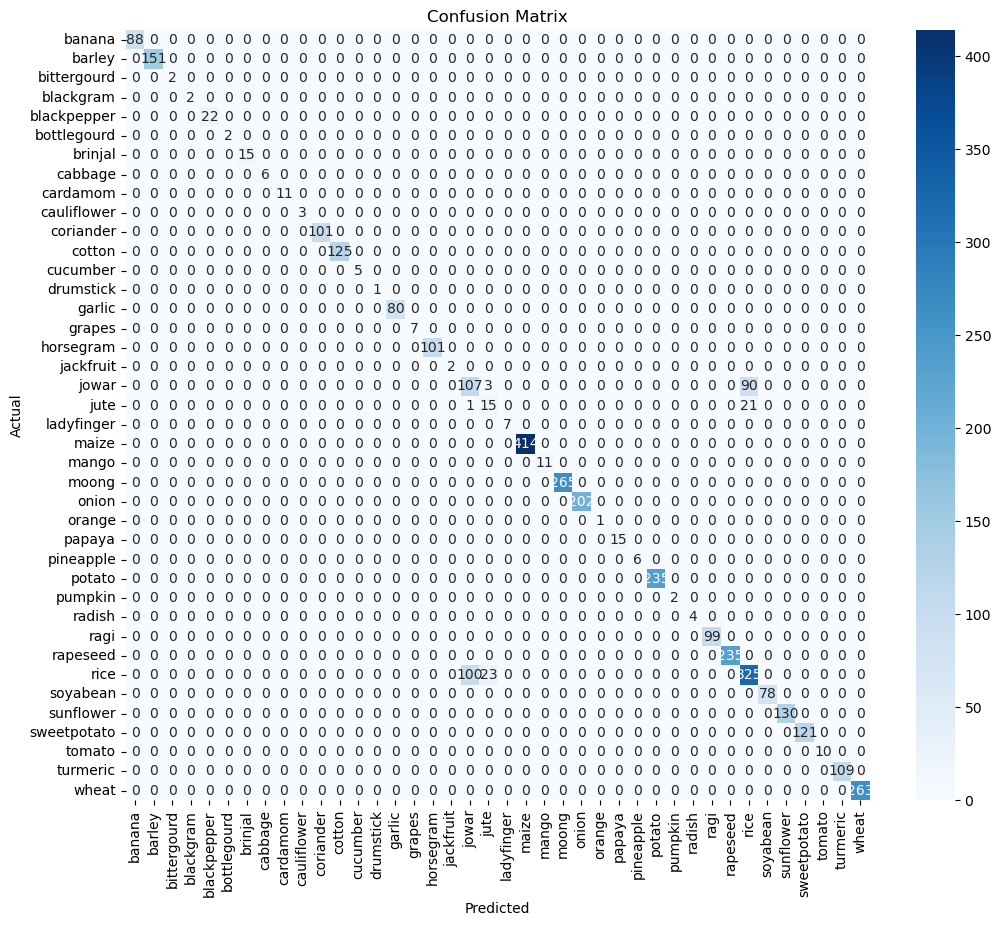

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        88
      barley       1.00      1.00      1.00       151
 bittergourd       1.00      1.00      1.00         2
   blackgram       1.00      1.00      1.00         2
 blackpepper       1.00      1.00      1.00        22
 bottlegourd       1.00      1.00      1.00         2
     brinjal       1.00      1.00      1.00        15
     cabbage       1.00      1.00      1.00         6
    cardamom       1.00      1.00      1.00        11
 cauliflower       1.00      1.00      1.00         3
   coriander       1.00      1.00      1.00       101
      cotton       1.00      1.00      1.00       125
    cucumber       1.00      1.00      1.00         5
   drumstick       1.00      1.00      1.00         1
      garlic       1.00      1.00      1.00        80
      grapes       1.00      1.00      1.00         7
   horsegram       1.00      1.00      1.00       101
   jackfruit       1.00    

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dataset load
df = pd.read_csv("Train Dataset.csv")

# Features aur target alag karo
X = df.drop(columns=["Crop"])   # X me sirf numerical features (N,P,K,pH,rainfall,temp)
y = df["Crop"]    

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report print
print(classification_report(y_test, y_pred))


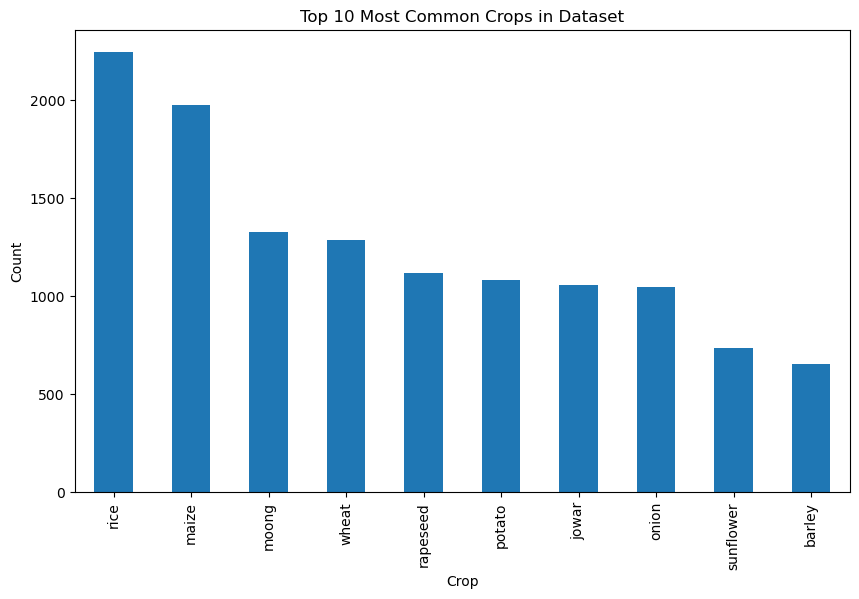

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Crop'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Crops in Dataset")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()


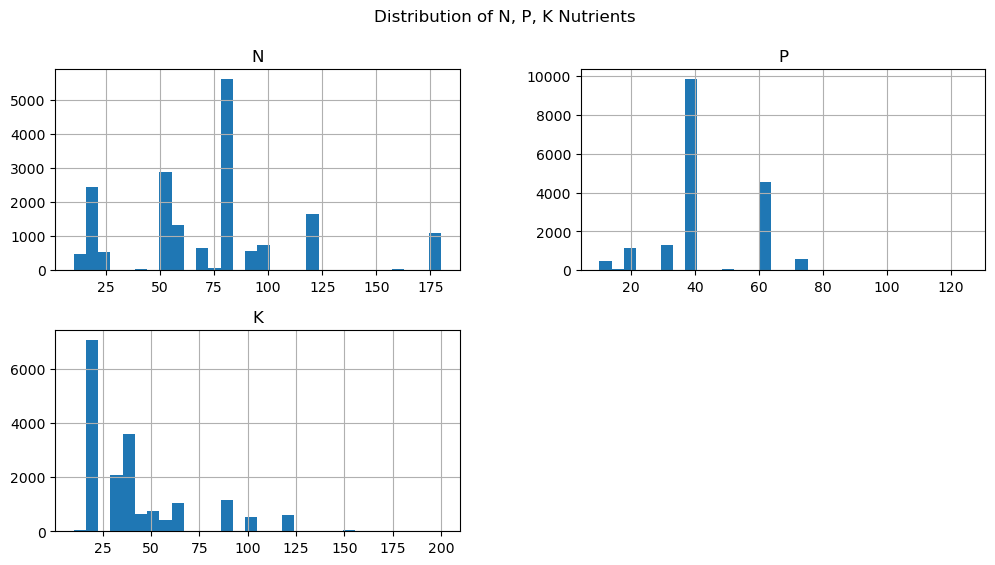

In [11]:
df[['N','P','K']].hist(bins=30, figsize=(12,6))
plt.suptitle("Distribution of N, P, K Nutrients")
plt.show()


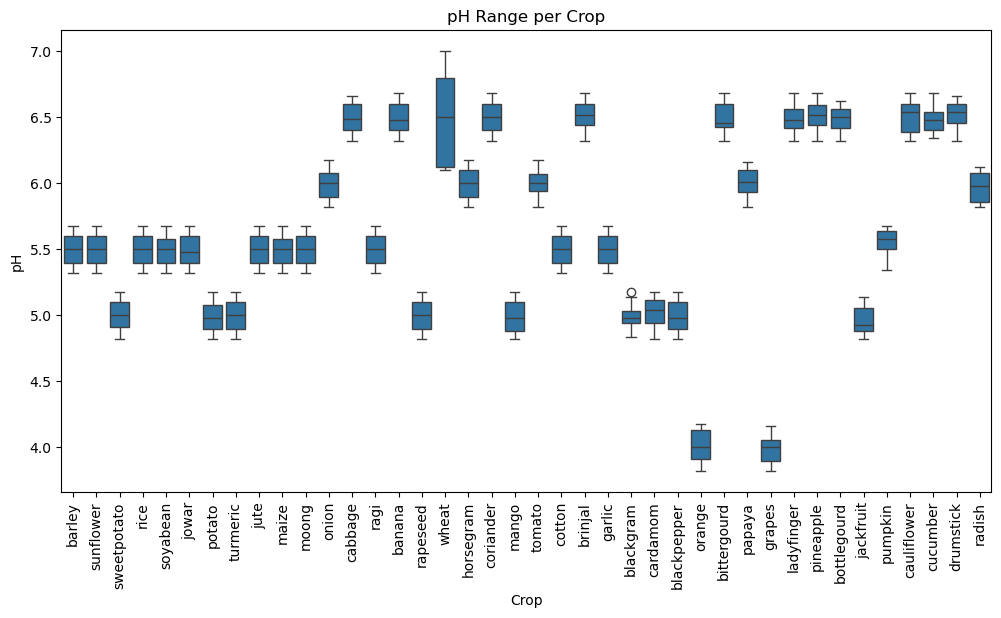

In [12]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="Crop", y="pH", data=df)
plt.xticks(rotation=90)
plt.title("pH Range per Crop")
plt.show()


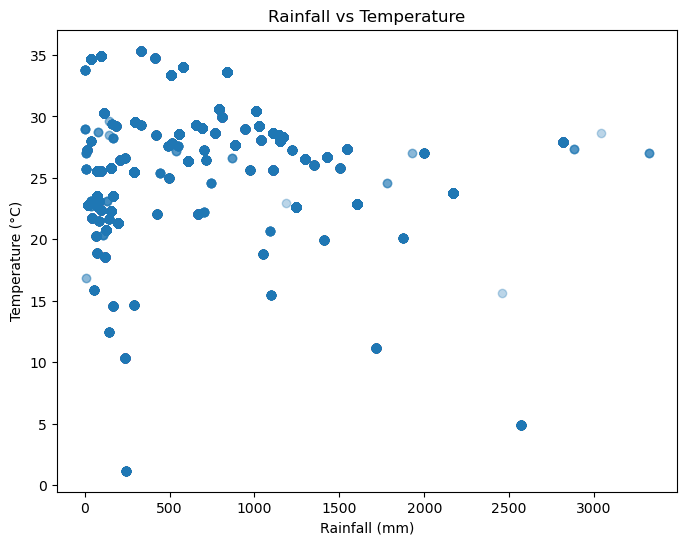

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['rainfall'], df['temperature'], alpha=0.3)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Temperature (°C)")
plt.title("Rainfall vs Temperature")
plt.show()


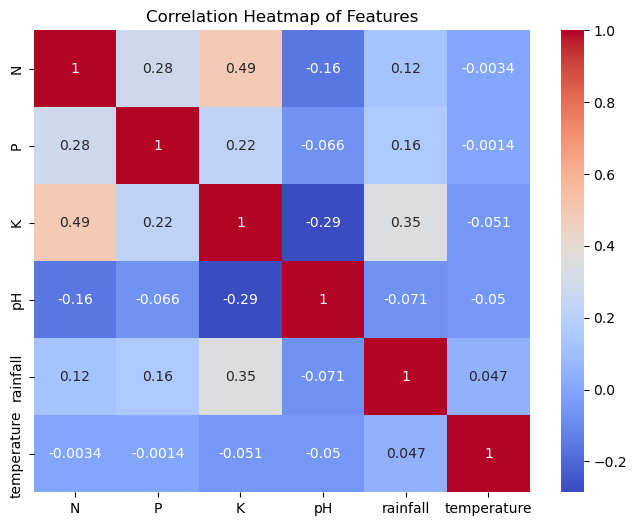

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['N','P','K','pH','rainfall','temperature']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


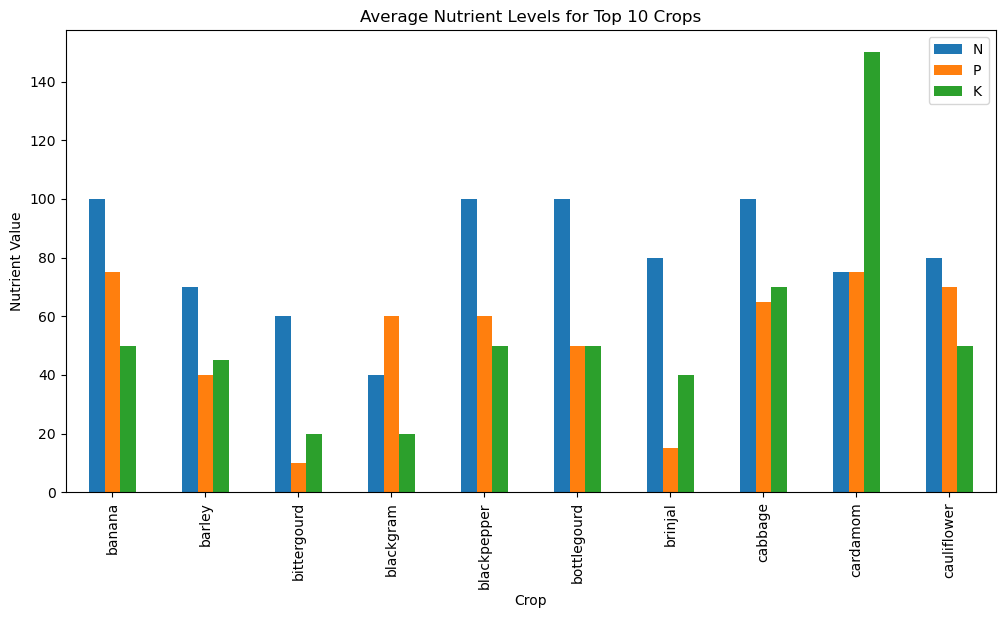

In [15]:
avg_nutrients = df.groupby('Crop')[['N','P','K']].mean().head(10)

avg_nutrients.plot(kind='bar', figsize=(12,6))
plt.title("Average Nutrient Levels for Top 10 Crops")
plt.ylabel("Nutrient Value")
plt.show()
